[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1

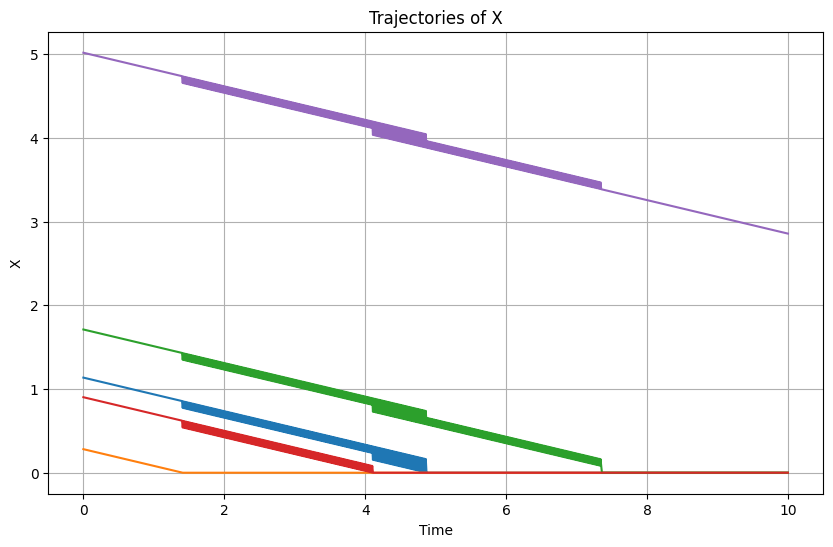

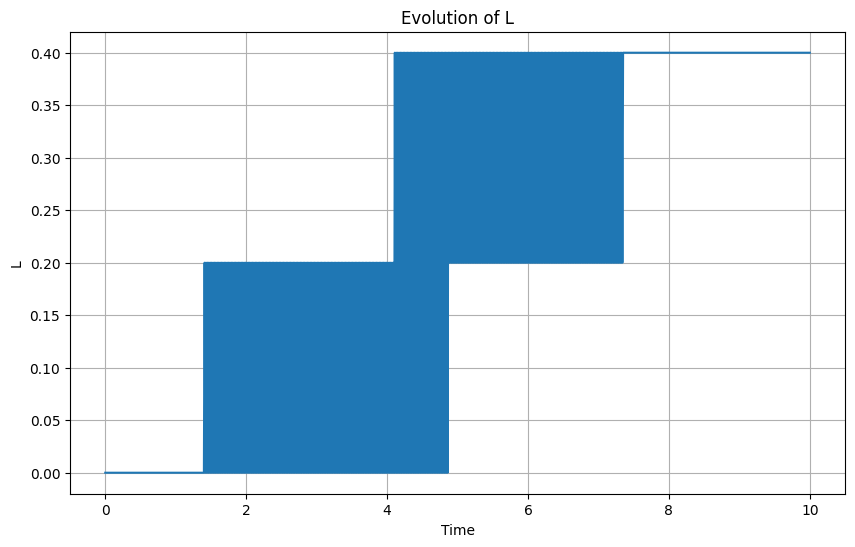

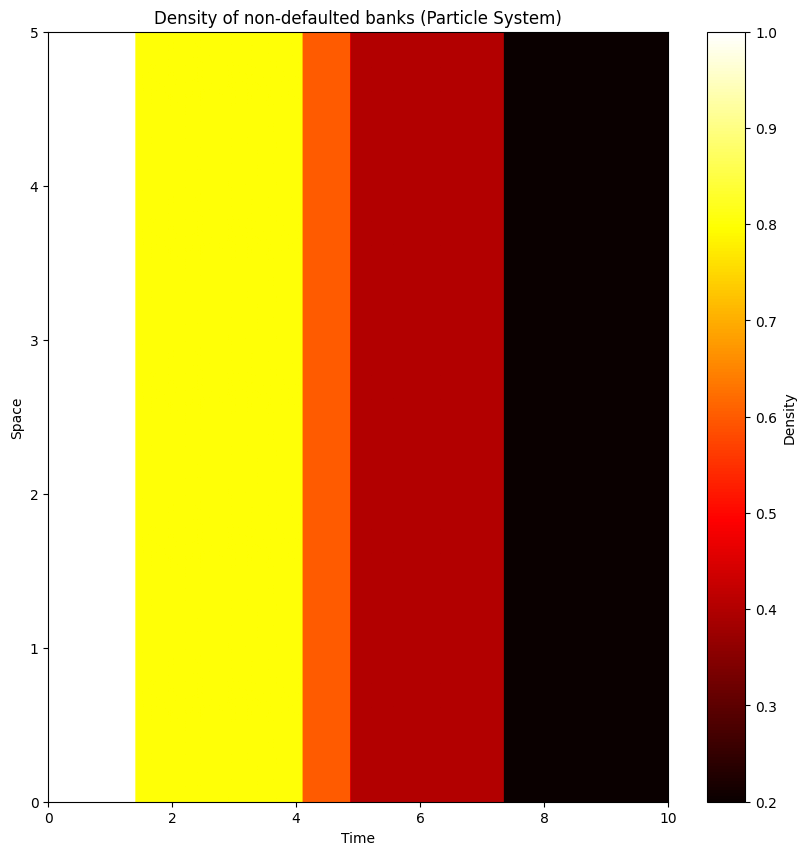

In [ ]:
 import numpy as np

def simulate_mckean_vlasov_with_defaults(N, T, dt, alpha, b, sigma):
    num_steps = int(T / dt)
    sqrt_dt = np.sqrt(dt)

    # Initialize arrays to store trajectories
    X = np.zeros((N, num_steps + 1))
    L = np.zeros(num_steps + 1)
    densities = np.zeros((num_steps + 1, N))

    # Initialize X0
    X[:, 0] = np.random.exponential(scale=1, size=N)  # Independent random variables
    Y = np.full(N, False)
    # Simulation loop
    for t in range(num_steps):
        # Compute drift and volatility at time t
        #b_t = b(t * dt)
        #sigma_t = sigma(t * dt)


        #On souhaite incrémenter que les banques qui n'ont pas eu défaut
        non_defaulted_indices = np.where(~Y)[0]  # Get indices where Y is False
        print(non_defaulted_indices)
        for idx in non_defaulted_indices:
            X[idx, t + 1] = X[idx, t] - 0.2*dt #np.sqrt(dt) * np.random.randn()


        for i in range(N):
          if Y[i]==True:
            Y[i]=False
        # Compute Lt
        k = 0
        for idx in non_defaulted_indices:
            Y[idx] = (X[idx, t+1] <= 0)


        nk = np.sum(Y)


        while nk > k :
            k = nk
            for idx in non_defaulted_indices:
                Y[idx] = ((X[idx, t+1] - alpha * k/N) <= 0)

            nk = np.sum(Y)

        #print(X[Y, t + 1])
        X[Y, t + 1] = 0

        L[t+1] = nk / N


        # Update X using Euler-Maruyama scheme


        for i in range(N):
          if X[i, t + 1]>0:
              X[i, t + 1] = X[i, t+1]  - alpha * (L[t+1]-L[t])

        #densities[t + 1, :] = np.where(X[:, t + 1] > 0, 1, 0)
        for t in range(num_steps + 1):
            densities[t, :] = np.sum(X[:, t] > 0) / N


    return X, L, densities

# Parameters
N = 5  # Number of banks
T = 10.0  # Total time
dt = 0.01  # Time step
alpha = 0.4  # Constant alpha

# Drift and volatility functions (example)
def b(t):
    return 0.1  # Constant drift

def sigma(t):
    return 0.2  # Constant volatility

# Simulation
X, L, densities = simulate_mckean_vlasov_with_defaults(N, T, dt, alpha, b, sigma)


# Plotting (example)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, X.shape[1]), X.T)
plt.xlabel('Time')
plt.ylabel('X')
plt.title('Trajectories of X')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, len(L)), L)
plt.xlabel('Time')
plt.ylabel('L')
plt.title('Evolution of L')
plt.grid(True)
plt.show()

# Plotting density for particle system simulation
plt.figure(figsize=(10, 10))
plt.imshow(densities.T,extent=[0, T, 0, N], aspect='auto', origin='lower', cmap='hot')

plt.colorbar(label='Density')
plt.xlabel('Time')
plt.ylabel('Space')
plt.title('Density of non-defaulted banks (Particle System)')
plt.show()





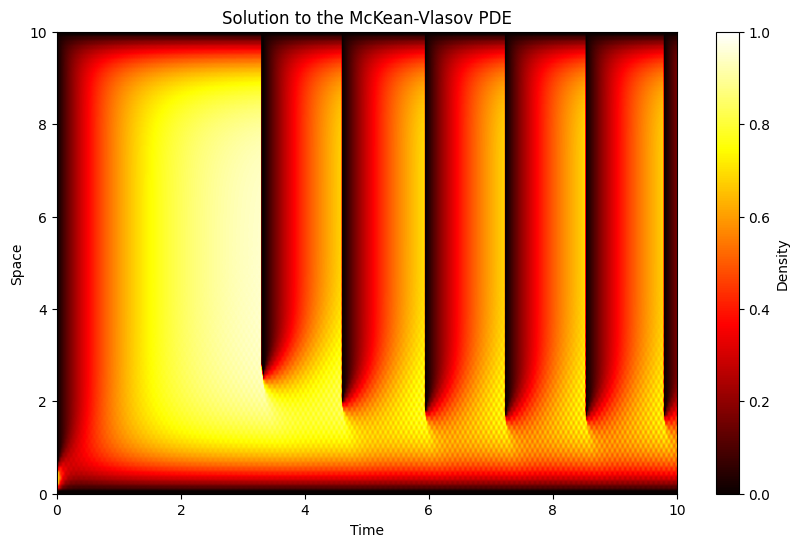

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.9
T = 10.0
dt = 0.01
dx = 0.1
Nx = 100  # Number of spatial grid points
Nt = int(T / dt)  # Number of time steps

# Initialize solution array
V = np.zeros((Nt+1, Nx+1))

# Set initial condition
V[0, :] = np.where((0.2 <= np.arange(0, Nx+1) * dx) & (np.arange(0, Nx+1) * dx <= 0.4), 1, 0)

# Solve the PDE using finite differences
for t in range(Nt):
    for x_idx in range(1, Nx):  # Skip the first and last points for boundary conditions
        V[t+1, x_idx] = V[t, x_idx] + 0.5 * (V[t, x_idx+1] - 2*V[t, x_idx] + V[t, x_idx-1]) * dt / (dx**2) + alpha * (1 - V[t, x_idx]) * dt

        # Check for blow-up time
        if V[t+1, x_idx] > 1:
            V[t+1, x_idx] = 1
            break

# Plot the solution
X = np.arange(0, Nx+1) * dx
T_values = np.arange(0, Nt+1) * dt

plt.figure(figsize=(10, 6))
plt.imshow(V.T, extent=[0, T, 0, X[-1]], aspect='auto', origin='lower', cmap='hot')
plt.colorbar(label='Density')
plt.xlabel('Time')
plt.ylabel('Space')
plt.title('Solution to the McKean-Vlasov PDE')
plt.show()


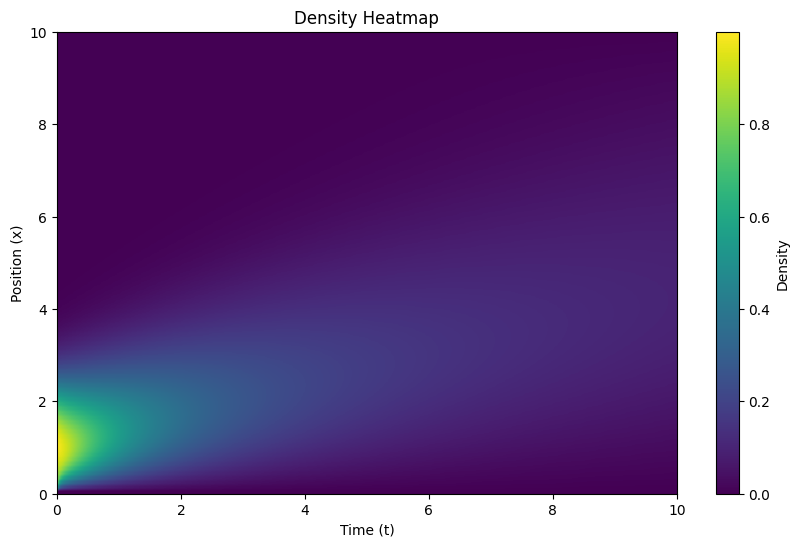

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solve_mckean_vlasov_density_equation(alpha, delta_t, delta_x, T, u, epsilon):
    # Initialize parameters
    time_steps = int(T / delta_t)
    space_steps = int(u / delta_x)

    # Initialize grid
    x_values = np.linspace(0, u, space_steps)
    v_values = np.zeros((time_steps, space_steps))
    l_values = np.zeros(time_steps)

    # Initial condition
    v_values[0] = initial_density_function(x_values)

    for t in range(1, time_steps):
        # Calculate drift term
        l_values[t-1] = calculate_loss(v_values[t-1], alpha, delta_x)

        # Solve PDE
        v_values[t] = solve_pde(v_values[t-1], alpha, l_values[t-1], delta_t, delta_x)

        # Check stopping criterion
        if np.abs(l_values[t] - l_values[t-1]) < epsilon:
            break

    return v_values, l_values

def initial_density_function(x):
    # Define the initial density function (e.g., Gaussian)
    return np.exp(-0.5 * (x - 1)**2)

def calculate_loss(v, alpha, delta_x):
    # Calculate the loss
    return 1 - np.sum(v) * delta_x

def solve_pde(v_prev, alpha, l, delta_t, delta_x):
    # Solve the PDE using finite differences
    v_next = np.zeros_like(v_prev)

    for i in range(1, len(v_prev)-1):
        v_next[i] = v_prev[i] + (0.5 * delta_t / delta_x**2) * (v_prev[i+1] - 2*v_prev[i] + v_prev[i-1]) \
                    + alpha * l * delta_t * (v_prev[i+1] - v_prev[i-1]) / (2 * delta_x)

    # Boundary condition
    v_next[0] = 0

    return v_next

# Parameters
alpha = 0.9
delta_t = 0.01
delta_x = 0.1
T = 10
u = 10
epsilon = 1e-6

# Solve the McKean Vlasov density equation
density_values, loss_values = solve_mckean_vlasov_density_equation(alpha, delta_t, delta_x, T, u, epsilon)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(density_values.T, extent=[0, T, 0, u], origin='lower', aspect='auto')
plt.colorbar(label='Density')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Density Heatmap')
plt.show()


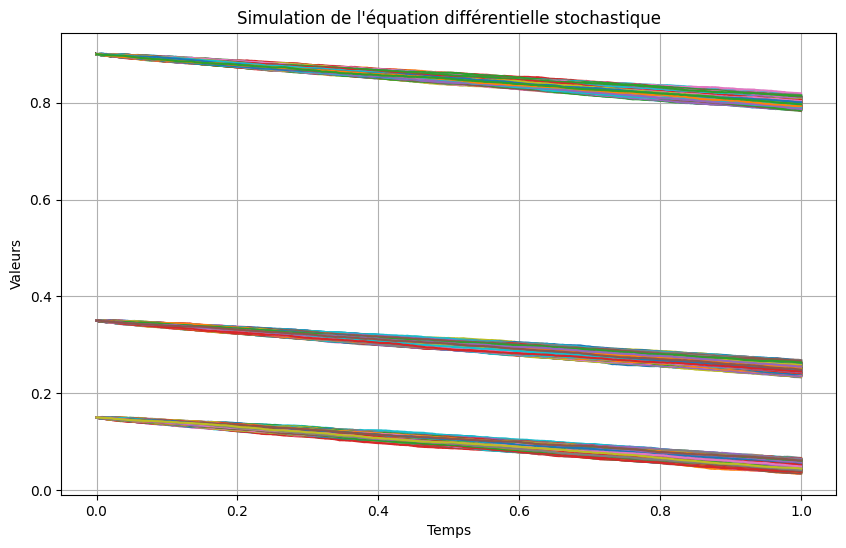

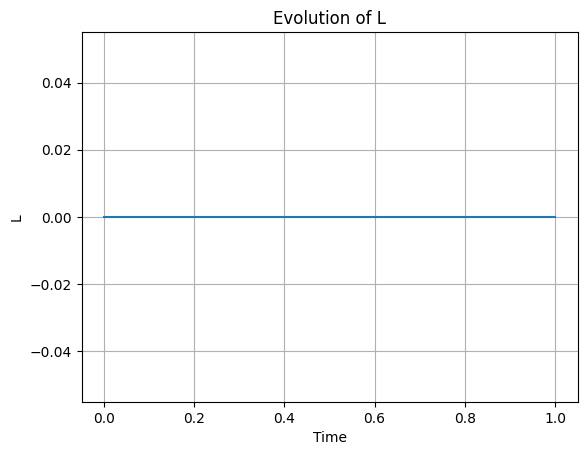

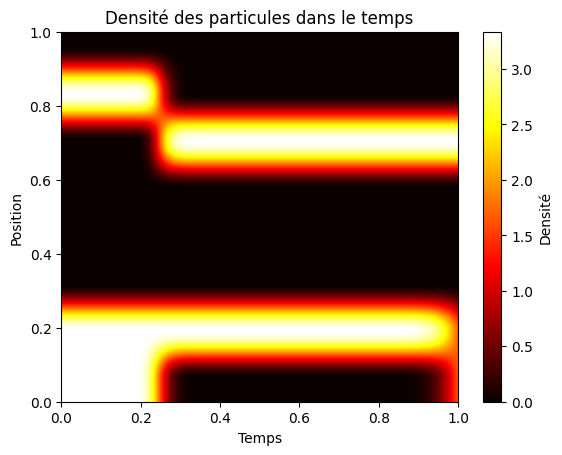

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Paramètres
alpha = 0.4
T = 1
n = 9999 # nombre de particules
N = 1000  # Nombre de pas de discrétisation
dt = T / N
X_max = 5
step=40
dx = X_max /step


# Génération du processus de Wiener
dW = np.sqrt(dt) * np.random.randn(N, n)  # Matrice de dimensions (N, n)

# Initialisation des vecteurs pour stocker les valeurs de X et L
#X0 = 0.6*np.random.randint(1,2,size=n)  # loi uniforme

X0=np.random.rand(n)



X0[:n//3]=0.9*np.random.randint(1,2,size=n//3)

X0[n//3:2*(n//3)]=0.35*np.random.randint(1,2,size=n//3)

X0[2*(n//3):]=0.15*np.random.randint(1,2,size=n//3)


X = np.zeros((N + 1, n))
L = np.zeros(N + 1)
densities = np.zeros((N + 1, step))

# Conditions initiales

X[0, :] = X0



# Calcul de X et L
for i in range(1, N + 1):  # boucle sur le temps (lignes)
    for j in range(n):  # boucle sur les particules (colonnes)
       if X[i-1,j] <= 0 : X[i,j] = 0
       else :   X[i, j] = X[i - 1, j] - 0.1 *dt + 0.005*dW[i - 1, j]

    k = 0
    Y = (X[i, :] <= 0)
    nk = np.sum(Y)  # nbre des X qui ont passé en dessous de zero jusqu'à cet instant

    while nk > k:
        k = nk
        Y = (X[i, :] - alpha * k / N) <= 0
        nk = np.sum(Y)

    # Mise à jour de Lt
    r = nk/n
    if r >= L[i-1] :    L[i] =  nk / n
    else : L[i] = L[i-1]

    for j in range(n):
      if (X[i , j]  - alpha * (L[i] - L[i - 1])) <= 0 : X[i,j] = 0
      else : X[i,j] = X[i , j]  - alpha * (L[i] - L[i - 1])

    # Calcul des densités
    for k in range(step):
      count =0
      for j in range(n):
            count += (X[i, j] <= (k + 1) * dx) & (X[i, j] >= k* dx)
      densities[i, k] = count * (1 / N)

fig, ax = plt.subplots(figsize=(10, 6))
t = np.linspace(0.0, T, N + 1)

for j in range(n):
    ax.plot(t, X[:, j])


plt.xlabel('Temps')
plt.ylabel('Valeurs')
plt.title('Simulation de l\'équation différentielle stochastique')
plt.grid(True)
plt.show()

plt.plot(np.linspace(0, T, len(L)), L)
plt.xlabel('Time')
plt.ylabel('L')
plt.title('Evolution of L')
plt.grid(True)
plt.show()



# Affichage des densités
plt.imshow(densities[:,1:].T, extent=[0, T, 0, 5], aspect='auto', origin='lower', cmap='hot')
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('Densité des particules dans le temps')
plt.colorbar(label='Densité')
plt.ylim(top=1)
plt.show()


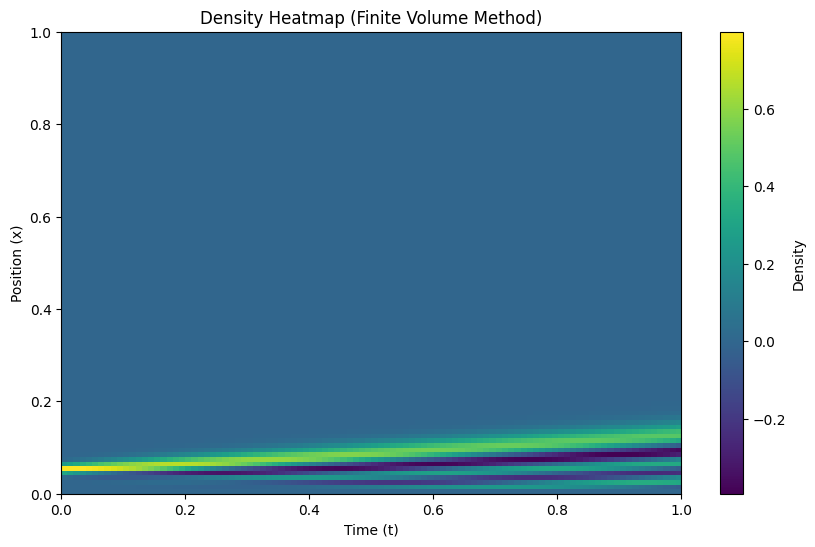

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.9
delta_t = 0.01
delta_x = 0.1
T = 1
u = 10
epsilon = 1e-6

# Number of cells
Nx = int(u / delta_x)
Nt = int(T / delta_t)

# Initialize density array
density_values = np.zeros((Nt, Nx))

# Initialize density function
density_values[0, :] = 2*np.exp(-100 * (np.linspace(0, u, Nx) - 0.5)**2) / np.sqrt(2 * np.pi)

# Solve the PDE using finite volume method
for t in range(1, Nt):
    for i in range(1, Nx-1):
        # Calculate fluxes at cell boundaries
        flux_left = alpha * (density_values[t-1, i] + density_values[t-1, i-1]) / 2
        flux_right = alpha * (density_values[t-1, i] + density_values[t-1, i+1]) / 2

        # Update density value in the cell
        density_values[t, i] = density_values[t-1, i] + delta_t * (flux_left - flux_right) / delta_x

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(density_values.T, extent=[0, T, 0, u], origin='lower', aspect='auto')
plt.colorbar(label='Density')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Density Heatmap (Finite Volume Method)')
plt.show()